In [1]:
import dlib
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Set display size for images
plt.rcParams['figure.figsize'] = [15, 10]

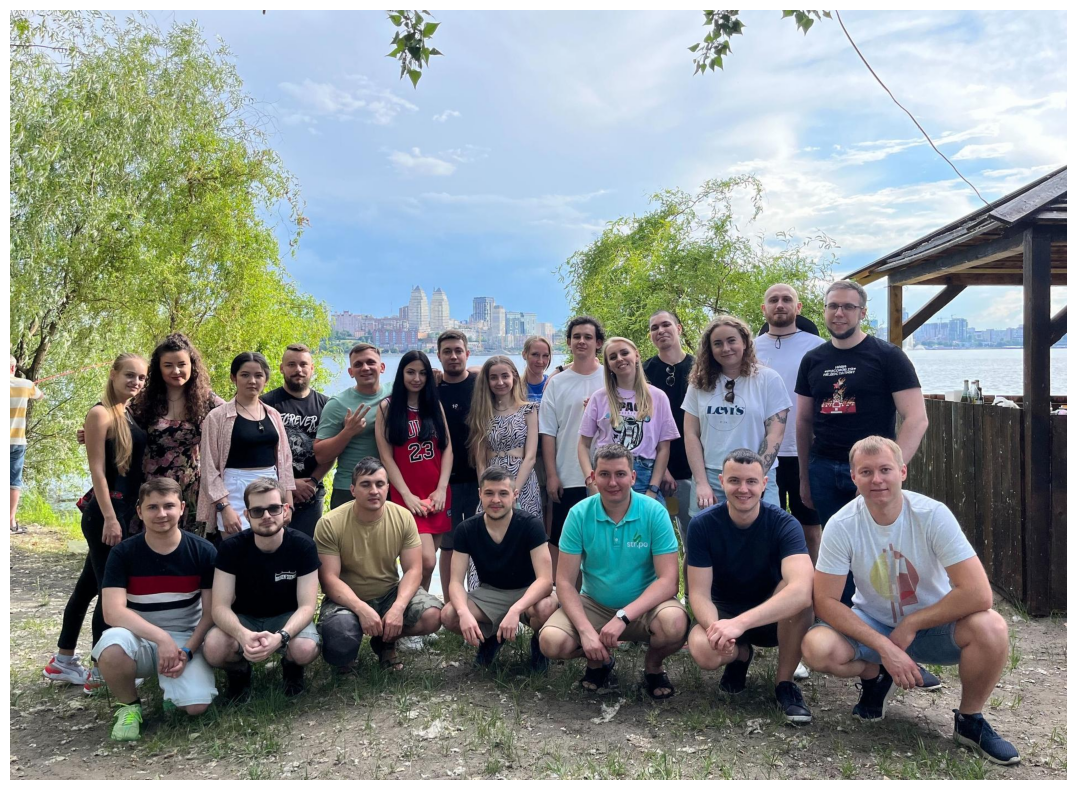

In [2]:
# Step 1: Load an image (the provided image with faces)
image_path = 'C:/Users/user/anaconda3/stripo_team.jpg'  
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert the image to RGB format for correct display with matplotlib
plt.imshow(img)
plt.axis('off')
plt.show()

In [10]:
# Step 2: Load the dlib CNN face detector and face landmark predictor
cnn_face_detector = dlib.cnn_face_detection_model_v1('C:/Users/user/anaconda3/mmod_human_face_detector.dat')  # Path to CNN face detector model
predictor = dlib.shape_predictor('C:/Users/user/anaconda3/shape_predictor_68_face_landmarks.dat')  # Path to the face landmark predictor


In [11]:
# Step 3: Convert the image to grayscale for better face detection
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [12]:
# Step 4: Run the CNN face detector
faces_cnn = cnn_face_detector(gray, 1)

In [13]:
# Check the number of detected faces
print(f'Number of detected faces: {len(faces_cnn)}')
faces_cnn = cnn_face_detector(gray, 1)

Number of detected faces: 22


In [14]:
# Step 5: Draw bounding boxes around the detected faces and plot the image
# Create a copy of the image for displaying the results
result_img = np.copy(img)

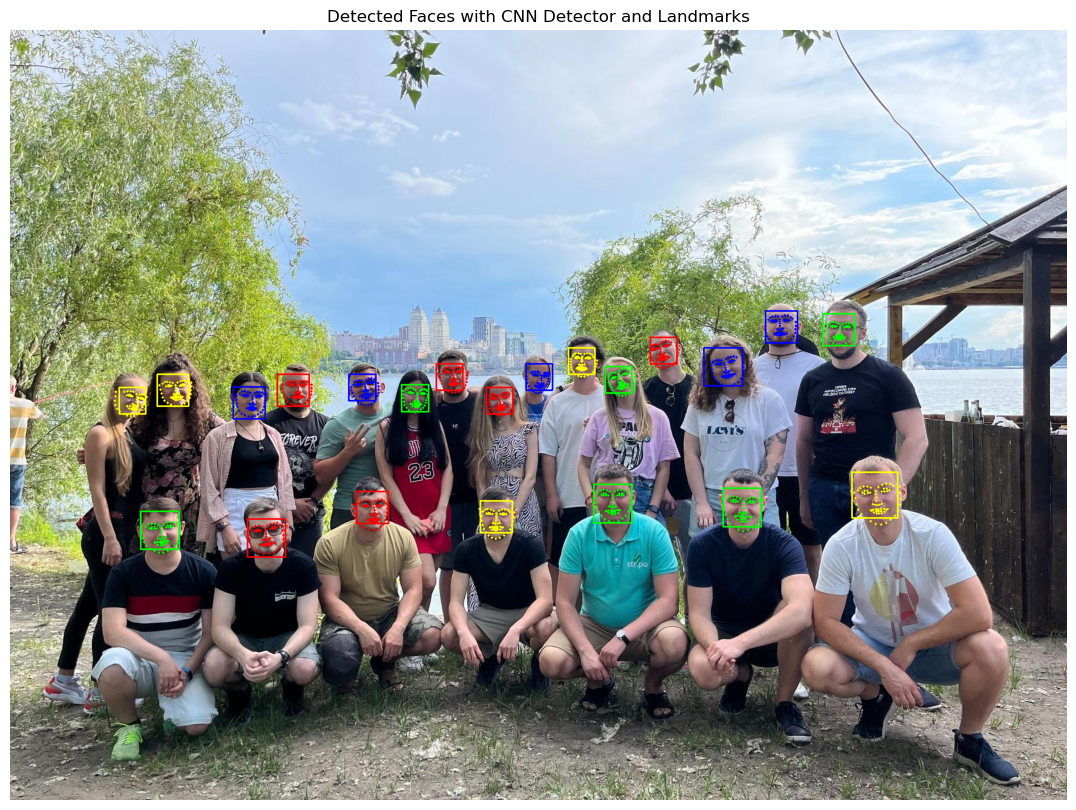

In [9]:
# Define colors for drawing bounding boxes
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]  # Colors for bounding boxes

# Iterate over all detected faces and draw bounding boxes
for i, face in enumerate(faces_cnn):
    rect = face.rect
    x, y, w, h = rect.left(), rect.top(), rect.width(), rect.height()
    color = colors[i % len(colors)]  # Choose a color for the bounding box
    cv2.rectangle(result_img, (x, y), (x+w, y+h), color, 2)
    landmarks = predictor(gray, rect)
    for n in range(0, 68):
        lx = landmarks.part(n).x
        ly = landmarks.part(n).y
        cv2.circle(result_img, (lx, ly), 2, color, -1)

# Display the image with the drawn bounding boxes
plt.imshow(result_img)
plt.title('Detected Faces with CNN Detector and Landmarks')
plt.axis('off')
plt.show()